In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
path = "../Resources/hawaii.sqlite"
engine = create_engine("sqlite:///" + path)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
precipitation = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Display the row's columns and data in dictionary format
first_row = session.query(precipitation).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2030f5852c8>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [10]:
# Find the most recent date in the data set.
session.query(precipitation.date).order_by(precipitation.date.desc()).first()

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation - Last Twelve Months')

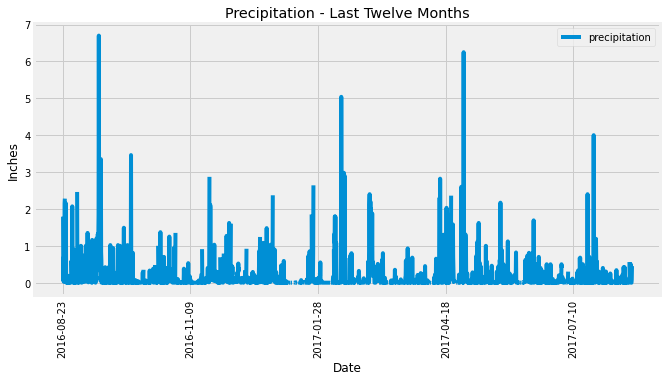

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(precipitation.date, precipitation.prcp).\
    filter(precipitation.date >= query_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
last_df = pd.DataFrame(last_12_months, columns=['date', 'precipitation'])
last_df.set_index('date', inplace=True)

# Sort the dataframe by date
last_df.sort_values(by = 'date', inplace=True)

# # Use Pandas Plotting with Matplotlib to plot the data
ax = last_df.plot(rot=90, figsize=[10,5], x_compat=True)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.title("Precipitation - Last Twelve Months")




In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Display the row's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20310eb7708>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

In [16]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
print(f"There are {total_stations} stations.")

There are 9 stations.


In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(station.station, func.count(precipitation.tobs)).\
    filter(station.station == precipitation.station).\
    order_by(func.count(precipitation.tobs).desc()).group_by(station.station).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()